In [1]:
# 주요 라이브러리 임포트

# 파이썬 warning 무시
import warnings
warnings.filterwarnings('ignore')


# pandas import 및 출력 설정
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# numpy
import numpy as np

# matplotlib 및 출력 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,20)

# seaborn
import seaborn as sns

%matplotlib inline

In [2]:
# 원본 데이터셋 로드
dir_dataset = "C:/Users/0stix/Datasets/"
name_project = 'hand_gesture'
df_test = pd.read_csv(dir_dataset+name_project+'/test.csv')
df_train = pd.read_csv(dir_dataset+name_project+'/train.csv')
df_sub = pd.read_csv(dir_dataset+name_project+'/sample_submission.csv')
# df_all.info()
# df_all.head()

len_train = len(df_train)
df_all = pd.concat([df_train, df_test], axis=0).drop('id', axis=1)

target = 'target'

In [39]:
df_all.head()
# df_all.info()
# df_all.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,25.017645,-4.061254,0.996632,-3.837345,-13.956994,-2.042957,2.130210,-1.957662,-1.149930,6.082028,0.878612,5.093102,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1.0
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,2.952843,-5.046353,1.083819,3.978378,-25.072542,-2.041602,2.912269,-3.998035,6.069698,4.966187,1.994051,-1.132059,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1.0
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,-23.218408,-9.000630,9.115957,12.097318,-10.954367,-3.930714,-19.069594,-6.118940,-5.001346,-9.105371,-9.894885,10.107614,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0.0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,-15.123774,-0.069867,-0.114247,-1.896109,5.127194,-2.877423,2.970044,-1.099702,3.116767,8.124209,-0.917418,-1.027199,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1.0
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,16.010442,5.961219,9.907115,-0.067754,-9.970728,0.868499,1.892233,-3.161698,-9.225990,3.953956,-17.959652,-3.115491,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2.0


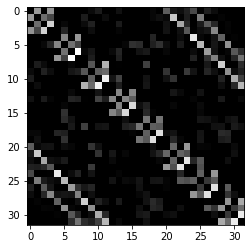

In [108]:
from PIL import Image
mat = df_all.iloc[:,:32].corr().values
for idx_ in range(len(mat)):
    mat[idx_,idx_] = 0.0
max_ = np.max(mat)
img = Image.fromarray(mat/max_*255)
plt.imshow(img)

In [5]:
df_all[target].value_counts()

3.0    599
2.0    593
1.0    574
0.0    569
Name: target, dtype: int64

In [109]:
from itertools import combinations as cb
df_v0 = df_all.copy()

for each_ in df_v0.drop(target, axis=1):
    min_ = np.min(df_v0[each_])
    max_ = np.max(df_v0[each_])
    
    df_v0[each_] = (df_v0[each_] - min_) / (max_ - min_)
    
#     df_v0[each_] = df_v0[each_] - np.mean(df_v0[each_])
#     df_v0[each_] = df_v0[each_]/np.var(df_v0[each_]) + 1

# for a_, b_ in cb(range(1, 33), 2):
#     str_ = 'd '+ str(a_).zfill(2) + '_'+ str(b_).zfill(2)
#     df_v0[str_] = df_v0['sensor_'+str(a_)] - df_v0['sensor_'+str(b_)]
# cnt_ = 0

# for a_, b_ in cb(df_v0.drop(target, axis=1).columns, 2):
#     str_ = str(cnt_)
#     df_v0[str_] = df_v0[b_] - df_v0[a_]
#     cnt_ += 1

In [111]:
X_ = df_v0.drop(target, axis=1).values
X_train, X_test = X_[:len_train], X_[len_train:]
y_train = df_v0[target][:len_train].values

X_train.shape, X_test.shape, y_train.shape

((2335, 32), (9343, 32), (2335,))

In [93]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
scores = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=5)
np.mean(scores), scores

[22:15:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

(0.812847965738758,
 array([0.82441113, 0.81156317, 0.81156317, 0.81798715, 0.7987152 ]))

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


import random
random.seed(42)
torch.manual_seed(42)

In [133]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

for epoch in range(200):
    running_loss = 0.0
    accuracy = 0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad() # 매개변수를 0으로 만듭니다. 매 학습시 초기화해줘야합니다.
        outputs = model(inputs) # 입력값을 넣어 순전파를 진행시킵니다.

        loss = criterion(outputs, labels) # 모델 출력값와 실제값을 손실함수에 대입합니다.
        loss.backward() # 손실함수에서 역전파 수행합니다.
        optimizer.step() # 옵티마이저를 사용해 매개변수를 최적화합니다.

        running_loss += loss.item()

        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                accuracy = accuracy + 1

        
                
    print('EPOCH {:3}, loss:{:5.4f}, accuracy:{:5.4f} '.format(epoch, running_loss / i, accuracy / (i * 16)))

EPOCH   0, loss:0.1394, accuracy:0.9569 
EPOCH   1, loss:0.1266, accuracy:0.9556 
EPOCH   2, loss:0.0700, accuracy:0.9802 
EPOCH   3, loss:0.0640, accuracy:0.9866 
EPOCH   4, loss:0.1519, accuracy:0.9565 
EPOCH   5, loss:0.0190, accuracy:1.0017 
EPOCH   6, loss:0.0359, accuracy:0.9931 
EPOCH   7, loss:0.3321, accuracy:0.8983 
EPOCH   8, loss:0.1572, accuracy:0.9457 
EPOCH   9, loss:0.0432, accuracy:0.9922 
EPOCH  10, loss:0.0438, accuracy:0.9927 
EPOCH  11, loss:0.1038, accuracy:0.9728 
EPOCH  12, loss:0.4313, accuracy:0.8711 
EPOCH  13, loss:0.1140, accuracy:0.9659 
EPOCH  14, loss:0.0249, accuracy:1.0004 
EPOCH  15, loss:0.0089, accuracy:1.0060 
EPOCH  16, loss:0.0083, accuracy:1.0056 
EPOCH  17, loss:0.0116, accuracy:1.0043 
EPOCH  18, loss:0.0578, accuracy:0.9853 
EPOCH  19, loss:0.1459, accuracy:0.9509 
EPOCH  20, loss:0.2558, accuracy:0.9194 
EPOCH  21, loss:0.1504, accuracy:0.9539 
EPOCH  22, loss:0.0228, accuracy:1.0013 
EPOCH  23, loss:0.0334, accuracy:0.9974 
EPOCH  24, loss:

In [126]:
model.eval() # 모델을 평가모드로 바꿉니다. dropout이 일어나지 않습니다.

with torch.no_grad(): # 이 안의 코드는 가중치 업데이트가 일어나지 않습니다.
    outputs = model(test_x)
    _, pred = torch.max(outputs, 1)

pred

tensor([0, 0, 1,  ..., 2, 0, 3])

In [119]:
df_sub['target'] = pred.numpy()
df_sub['target'].value_counts()

1    3243
2    2237
3    1984
0    1879
Name: target, dtype: int64

In [135]:
import torch
import numpy as np
import time
import copy

In [136]:
torch.cuda.empty_cache()
print('Your Machine is: ' + torch.cuda.get_device_name())

Your Machine is: NVIDIA GeForce RTX 3070


In [139]:
num_workers = 0
batch_size = 16
is_cuda = True if torch.cuda.is_available() else False

In [113]:
train_x = torch.from_numpy(X_train).float()
train_y = torch.tensor(y_train, dtype = torch.int64)
test_x = torch.from_numpy(X_test).float()

train_dataset = TensorDataset(train_x, train_y)

In [114]:
train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True)

for batch_idx, samples in enumerate(train_dataloader):
    if batch_idx > 0:
        break
    print(samples[0].shape)
    print(samples[1])

torch.Size([16, 32])
tensor([1, 3, 1, 1, 1, 2, 1, 0, 3, 0, 3, 0, 3, 2, 2, 0])


In [137]:
from sklearn.model_selection import train_test_split

In [147]:
# transform = transforms.ToTensor()

X_ = df_v0.drop(target, axis=1).values
X_train, X_te = X_[:len_train], X_[len_train:]
y_train = df_v0[target][:len_train].values

X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_tr = torch.from_numpy(X_tr).float()
X_va = torch.from_numpy(X_va).float()
X_te = torch.from_numpy(X_te).float()

y_tr = torch.tensor(y_tr, dtype=torch.int64)
y_va = torch.tensor(y_va, dtype=torch.int64)

X_tr.size(), y_tr.size()

(torch.Size([1868, 32]), torch.Size([1868]))

In [148]:
train_dataset = TensorDataset(X_tr, y_tr)
val_dataset = TensorDataset(X_va, y_va)
test_dataset = TensorDataset(X_te)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)



# train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
# test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

# train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

In [124]:
class Models(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 4),
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

model = Models()

print(model)

Models(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=4, bias=True)
  )
)


In [253]:
import torch.nn as nn
import torch.nn.functional as F

import torch.nn.init as I

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
#             nn.Linear(512, 512),
#             nn.BatchNorm1d(512),
#             nn.ReLU(),
#             nn.Dropout(0.2),
            
            nn.Linear(1024, 4),
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x
        
        #         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
#         self.fc1 = nn.Linear(12 * 12 * 16, 100)
#         self.fc2 = nn.Linear(100, 10)
        
# #         I.kaiming_normal_(self.conv1.weight)
# #         I.kaiming_normal_(self.fc1.weight)
# #         I.kaiming_normal_(self.fc2.weight)

#     def forward(self, x):
#         x = F.max_pool2d(F.relu(self.conv1(x)), 2)
#         x = F.relu(self.fc1(x.view(-1, 12 * 12 * 16)))
#         x = F.relu(self.fc2(x))
#         return x

model = Net()
if is_cuda:
    model.cuda()
print(model)

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=1024, out_features=1024, bias=True)
    (13): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=1024, out_features=4, bias=True)
  )
)


In [254]:
criterion = nn.CrossEntropyLoss()
if is_cuda:
    criterion.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# optimizer = torch.optim.SGD(model.parameters(), lr=.1)

In [255]:
best_loss = 10
best_state = None
cnt_epoch = 0

In [256]:
n_epochs = 500
time_start = time.time()
print('CUDA is' + (' ' if is_cuda else ' not ') + 'running.')

for epoch in range(n_epochs):
    cnt_epoch += 1
    train_loss = 0.0
    model.train()
    for data, target in train_loader:
        if is_cuda:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    val_loss = 0.0
    model.eval()
    for data, target in val_loader:
        if is_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        val_loss += loss.item() * data.size(0)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    
    if val_loss < best_loss:
        best_loss = val_loss
        best_state = copy.deepcopy(model.state_dict())
    
    print('Epoch {:3d}: \tTraining Loss: {:7.4f},\tValidation Loss: {:7.4f}'.format(cnt_epoch, train_loss, val_loss))
    
print('Elapsed Time: {:8.3f}Sec'.format(time.time()-time_start))
print(best_loss)

CUDA is running.
Epoch   1: 	Training Loss:  1.4195,	Validation Loss:  1.5198
Epoch   2: 	Training Loss:  1.3374,	Validation Loss:  1.5767
Epoch   3: 	Training Loss:  1.3161,	Validation Loss:  1.5440
Epoch   4: 	Training Loss:  1.2659,	Validation Loss:  1.5304
Epoch   5: 	Training Loss:  1.2399,	Validation Loss:  1.4166
Epoch   6: 	Training Loss:  1.1560,	Validation Loss:  1.5007
Epoch   7: 	Training Loss:  1.1393,	Validation Loss:  1.4185
Epoch   8: 	Training Loss:  1.0735,	Validation Loss:  1.4178
Epoch   9: 	Training Loss:  1.0473,	Validation Loss:  1.4126
Epoch  10: 	Training Loss:  1.0210,	Validation Loss:  1.4603
Epoch  11: 	Training Loss:  0.9831,	Validation Loss:  1.2872
Epoch  12: 	Training Loss:  0.9562,	Validation Loss:  1.3131
Epoch  13: 	Training Loss:  0.9410,	Validation Loss:  1.2280
Epoch  14: 	Training Loss:  0.9132,	Validation Loss:  1.2518
Epoch  15: 	Training Loss:  0.8700,	Validation Loss:  1.2417
Epoch  16: 	Training Loss:  0.9020,	Validation Loss:  1.2475
Epoch  

In [238]:
model.eval() # 모델을 평가모드로 바꿉니다. dropout이 일어나지 않습니다.
model.load_state_dict(best_state)

if is_cuda:
    X_te = X_te.cuda()

with torch.no_grad(): # 이 안의 코드는 가중치 업데이트가 일어나지 않습니다.
    outputs = model(X_te)
    _, pred = torch.max(outputs, 1)

pred

tensor([1, 0, 1,  ..., 2, 0, 3], device='cuda:0')

In [239]:
if is_cuda:
    pred = pred.cpu()

df_sub['target'] = pred.numpy()
df_sub['target'].value_counts()

1    3395
0    2143
2    2052
3    1753
Name: target, dtype: int64

In [ ]:
test_loss = 0.0
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))
confusion_matrix = [[0 for _ in range(10)] for _ in range(10)]

targets = []
preds = []

model.load_state_dict(best_state)

for data, target in test_loader:
    if is_cuda:
        data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(len(target.data)):
        label = target.data[i]
        predict = pred[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        confusion_matrix[label][predict] += 1

test_loss /= len(test_loader.dataset)
print('Test Loss: {:7.4f}'.format(test_loss))
print('Test Accuracy: {:6.2f}% ({:d}/{:d})'.format(100. * np.sum(class_correct) / np.sum(class_total), np.sum(class_correct), np.sum(class_total)))

print(' A\P| ' + ' '.join(map(lambda x:'{:4d}'.format(x), range(10))))
print('-'*4 + '+' + '-'*50)
for num_, each_ in enumerate(confusion_matrix):
    print('{:3d} | '.format(num_) + ' '.join(map(lambda x:'{:4d}'.format(x), each_)))

In [257]:
def submission(df_sub, dir_dataset, name_project):
    import datetime
    now = datetime.datetime.now()
    str_datetime = now.strftime("%y%m%d_%H%M%S")
    df_sub.to_csv(dir_dataset+'submission-'+name_project+'-'+str_datetime+'.csv', index = 0)

In [258]:
submission(df_sub, dir_dataset, name_project)